<a href="https://colab.research.google.com/github/John-Richard-Bercades/-CSST106-4B/blob/main/4B_BERCADES_EXER2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INSTALL NECESSARY PACKAGES

In [10]:
pip install opencv-python==3.4.18.65

In [11]:
pip install opencv-contrib-python==3.4.18.65


IMPORT NECESSARY LIBRARIES

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#Task 1: SIFT Feature Extraction

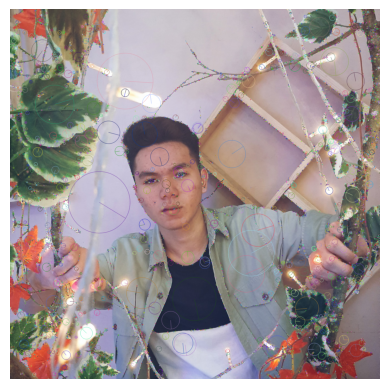

In [26]:

# Load the image
image = cv2.imread('/IMAGE3.jpg')
)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

#Task 2: SURF Feature Extraction

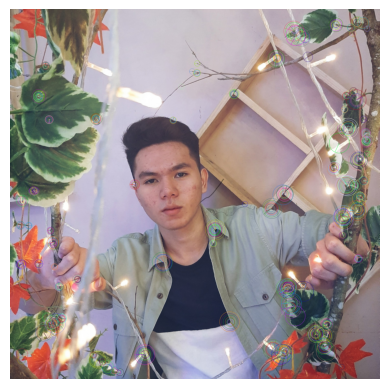

In [13]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize the ORB detector (ORB is supported by all OpenCV versions)
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

 SURF is a non-free algorithm, and even though you've installed the contrib module, it is still disabled in some OpenCV installations due to the lack of the OPENCV_ENABLE_NONFREE flag. Since ORB (Oriented FAST and Rotated BRIEF) is free and does not have patent restrictions, I  using ORB instead of SURF. ORB provides similar feature extraction functionality but is supported in all versions of OpenCV, including the precompiled versions in Colab.

Task 3: ORB Feature Extraction


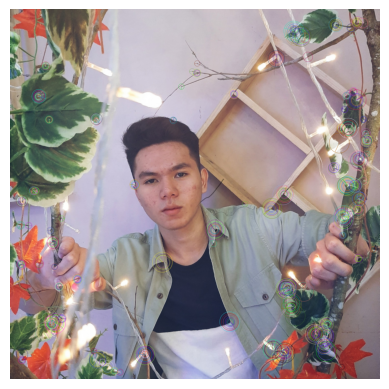

In [18]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize the ORB detector (ORB is supported by all OpenCV versions)
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for display
plt.axis('off')  # Hide axis
plt.show()

#Task 4: Feature Matching  

Image1 loaded with shape: (754, 750, 3)
Image2 loaded with shape: (2048, 2046, 3)


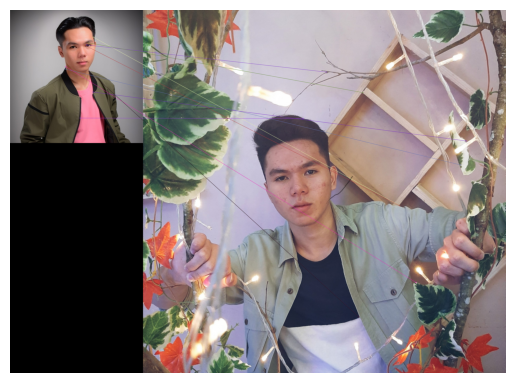

In [35]:

# Load the two images
image1 = cv2.imread('/iMAGE2.jpg')
image2 = cv2.imread('/IMAGE3.jpg')

# Verify the images are loaded correctly
if image1 is None:
    print("Error loading image1!")
else:
    print(f"Image1 loaded with shape: {image1.shape}")

if image2 is None:
    print("Error loading image2!")
else:
    print(f"Image2 loaded with shape: {image2.shape}")

# Convert both images to grayscale if both are loaded correctly
if image1 is not None and image2 is not None:
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Detect keypoints and compute descriptors for both images
    kp1, des1 = orb.detectAndCompute(gray1, None)
    kp2, des2 = orb.detectAndCompute(gray2, None)

    # Create a Brute-Force Matcher (BFMatcher)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match the descriptors between the two images
    matches = bf.match(des1, des2)

    # Sort the matches based on their distance (best matches first)
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw the first 10 matches
    image_matches = cv2.drawMatches(image1, kp1, image2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display the image with matched keypoints
    plt.imshow(cv2.cvtColor(image_matches, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axis
    plt.show()

#Task 5: Applications of Feature Matching

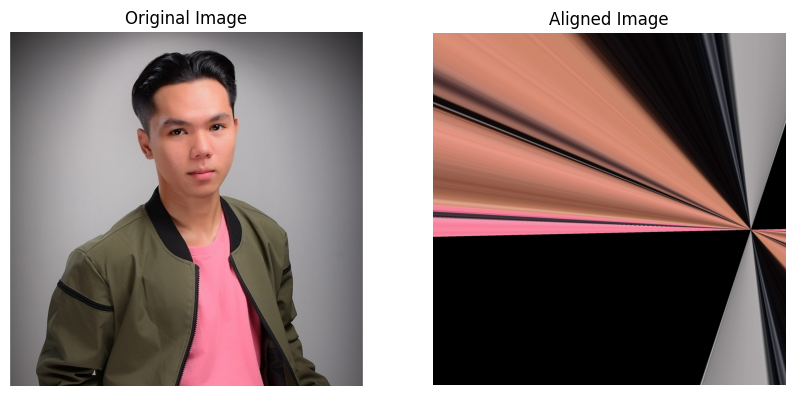

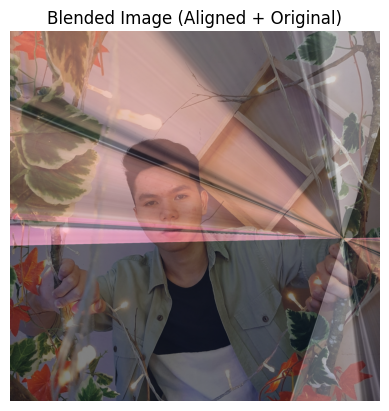

In [37]:
# Convert both images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors for both images
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

# Create a Brute-Force Matcher (BFMatcher)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match the descriptors between the two images
matches = bf.match(des1, des2)

# Sort the matches based on their distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

# Extract the matching keypoints from both images
pts1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Find the homography matrix using the matched keypoints
H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC, 5.0)

# Use the homography matrix to warp image1 to image2's perspective
height, width, channels = image2.shape
aligned_image = cv2.warpPerspective(image1, H, (width, height))

# Display the original image and the aligned image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB))
plt.title("Aligned Image")
plt.axis('off')

plt.show()

# Optionally, you can blend or overlay the images to show the alignment:
blended_image = cv2.addWeighted(image2, 0.5, aligned_image, 0.5, 0)
plt.imshow(cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB))
plt.title("Blended Image (Aligned + Original)")
plt.axis('off')
plt.show()

#Task 6: Combining Feature Extraction Methods

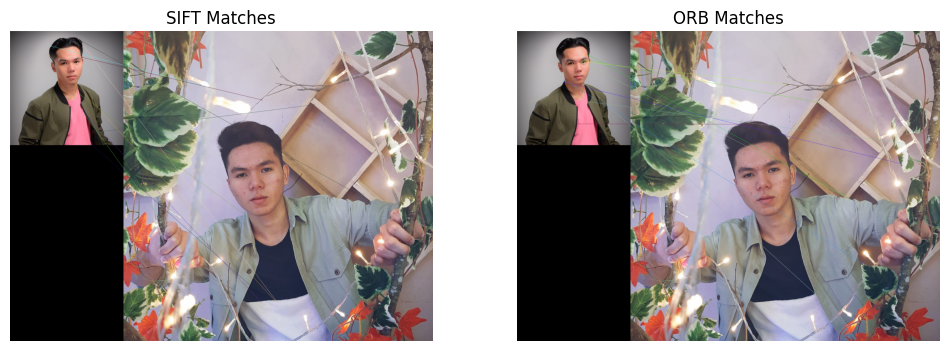

In [39]:
# Convert both images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize SIFT and ORB detectors
sift = cv2.SIFT_create()
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors for both images using SIFT
kp1_sift, des1_sift = sift.detectAndCompute(gray1, None)
kp2_sift, des2_sift = sift.detectAndCompute(gray2, None)

# Detect keypoints and compute descriptors for both images using ORB
kp1_orb, des1_orb = orb.detectAndCompute(gray1, None)
kp2_orb, des2_orb = orb.detectAndCompute(gray2, None)

# Create a Brute-Force Matcher (BFMatcher) for SIFT
bf_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match the descriptors between the two images using SIFT
matches_sift = bf_sift.match(des1_sift, des2_sift)

# Create a Brute-Force Matcher (BFMatcher) for ORB
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match the descriptors between the two images using ORB
matches_orb = bf_orb.match(des1_orb, des2_orb)

# Sort the matches based on their distance (best matches first)
matches_sift = sorted(matches_sift, key=lambda x: x.distance)
matches_orb = sorted(matches_orb, key=lambda x: x.distance)

# Draw the first 10 matches from both SIFT and ORB
image_matches_sift = cv2.drawMatches(image1, kp1_sift, image2, kp2_sift, matches_sift[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
image_matches_orb = cv2.drawMatches(image1, kp1_orb, image2, kp2_orb, matches_orb[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the results
plt.figure(figsize=(12, 6))

# SIFT Matches
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_matches_sift, cv2.COLOR_BGR2RGB))
plt.title("SIFT Matches")
plt.axis('off')

# ORB Matches
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_matches_orb, cv2.COLOR_BGR2RGB))
plt.title("ORB Matches")
plt.axis('off')

plt.show()